In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from itertools import permutations
import matplotlib.pyplot as plt

answers = pd.read_csv('answers.csv', index_col=0)

In [2]:
answers = answers.dropna()

answers.head()

,qid,i,qs,qt,tags,qvc,qac,aid,j,as,at
1,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563372,67183.0,2,1235000501
2,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563374,66554.0,0,1235000551
3,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563358,15842.0,3,1235000177
4,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563413,893.0,18,1235001545
5,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563454,11649.0,4,1235002457


In [3]:
answers.columns = ['Q_ID', 'Q_Person_ID', 'Q_Score', 'Q_Time', 'Tags', 'Q_Views', 'Q_A_Num', 'A_ID', 'A_Person_ID', 'A_Score', 'A_Time']
answers.head()

,Q_ID,Q_Person_ID,Q_Score,Q_Time,Tags,Q_Views,Q_A_Num,A_ID,A_Person_ID,A_Score,A_Time
1,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563372,67183.0,2,1235000501
2,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563374,66554.0,0,1235000551
3,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563358,15842.0,3,1235000177
4,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563413,893.0,18,1235001545
5,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563454,11649.0,4,1235002457


In [4]:
model = ols('A_Score ~ + Q_Score', data=answers).fit()

print(model.summary())
print(model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                A_Score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                 1.243e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:56:00   Log-Likelihood:            -6.9373e+05
No. Observations:              263132   AIC:                         1.387e+06
Df Residuals:                  263130   BIC:                         1.387e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4427      0.007    208.830      0.0

In [5]:
model = ols('Q_Score ~ + Q_Views', data=answers).fit()

print(model.summary())
print(model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                Q_Score   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 3.374e+05
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:56:00   Log-Likelihood:            -8.1972e+05
No. Observations:              263132   AIC:                         1.639e+06
Df Residuals:                  263130   BIC:                         1.639e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1339      0.011     11.691      0.0

In [6]:
def num_tags(tags_str):
  seperated = tags_str.split(',')
  return len(seperated)

answers['Tags_Num'] = answers['Tags'].apply(num_tags)

answers['Tags_Num'].head()

1    4
2    4
3    4
4    4
5    4
Name: Tags_Num, dtype: int64

In [7]:
y = answers.columns[9]
x = answers.columns[2]
x1 = answers.columns[5]
possible = list(answers.columns).copy()
possible.remove('A_Score')
possible.remove('Tags')
possible.remove('Q_Person_ID')
possible.remove('A_Person_ID')
possible.remove('Q_ID')
possible.remove('A_ID')
#possible = possible.remove('A_Score')
param = y + ' ~ ' + x + ' + ' + x1
print(param)

model2 = ols(param, data=answers).fit()
print(model2.summary())

print(possible)
print(answers.columns)

A_Score ~ Q_Score + Q_Views
                            OLS Regression Results                            
Dep. Variable:                A_Score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     7180.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:56:01   Log-Likelihood:            -6.9281e+05
No. Observations:              263132   AIC:                         1.386e+06
Df Residuals:                  263129   BIC:                         1.386e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3731   

In [8]:
temp = possible[0:4]

def best_model(names):
  highest = 0
  current = ''
  best = ''
  for i in range(1, len(names) + 1):
    all = permutations(names, i)
    for j in all:
      for k in j:
        current += ' + ' + k
      
      param = y + ' ~' + current
      temp_model = ols(param, data=answers).fit()
      if temp_model.rsquared_adj > highest:
        highest = temp_model.rsquared_adj
        best = temp_model

      current = ''
  
  return best

print(best_model(possible).summary())

                            OLS Regression Results                            
Dep. Variable:                A_Score   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2891.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:03:07   Log-Likelihood:            -6.9140e+05
No. Observations:              263132   AIC:                         1.383e+06
Df Residuals:                  263125   BIC:                         1.383e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1637      3.027      9.304      0.0

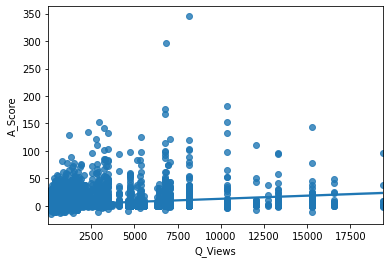

In [9]:
ax1 = sns.regplot(x='Q_Views', y='A_Score', data=answers)

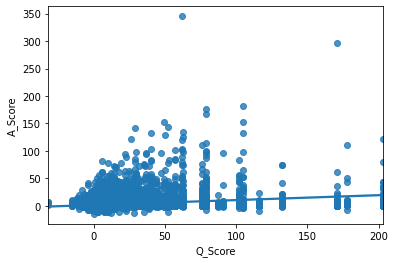

In [10]:
ax2 = sns.regplot(x='Q_Score', y='A_Score', data=answers)

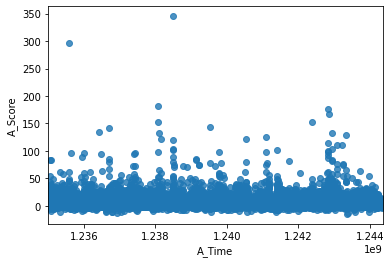

In [11]:
ax3 = sns.regplot(x='A_Time', y='A_Score', data=answers)

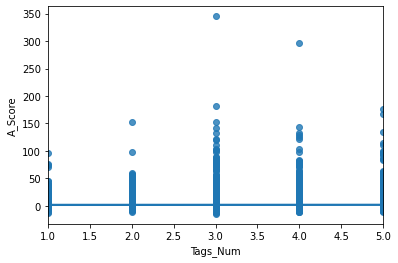

In [12]:
ax4 = sns.regplot(x='Tags_Num', y='A_Score', data=answers)

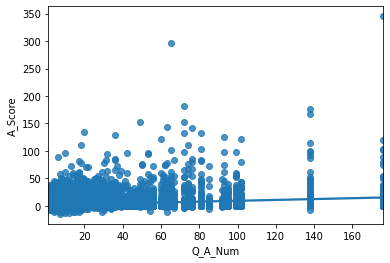

In [13]:
ax5 = sns.regplot(x='Q_A_Num', y='A_Score', data=answers)

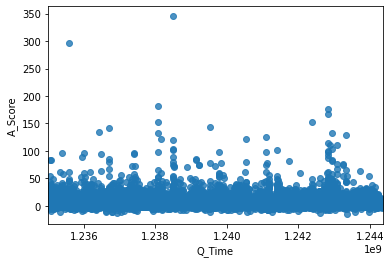

In [14]:
ax6 = sns.regplot(x='Q_Time', y='A_Score', data=answers)

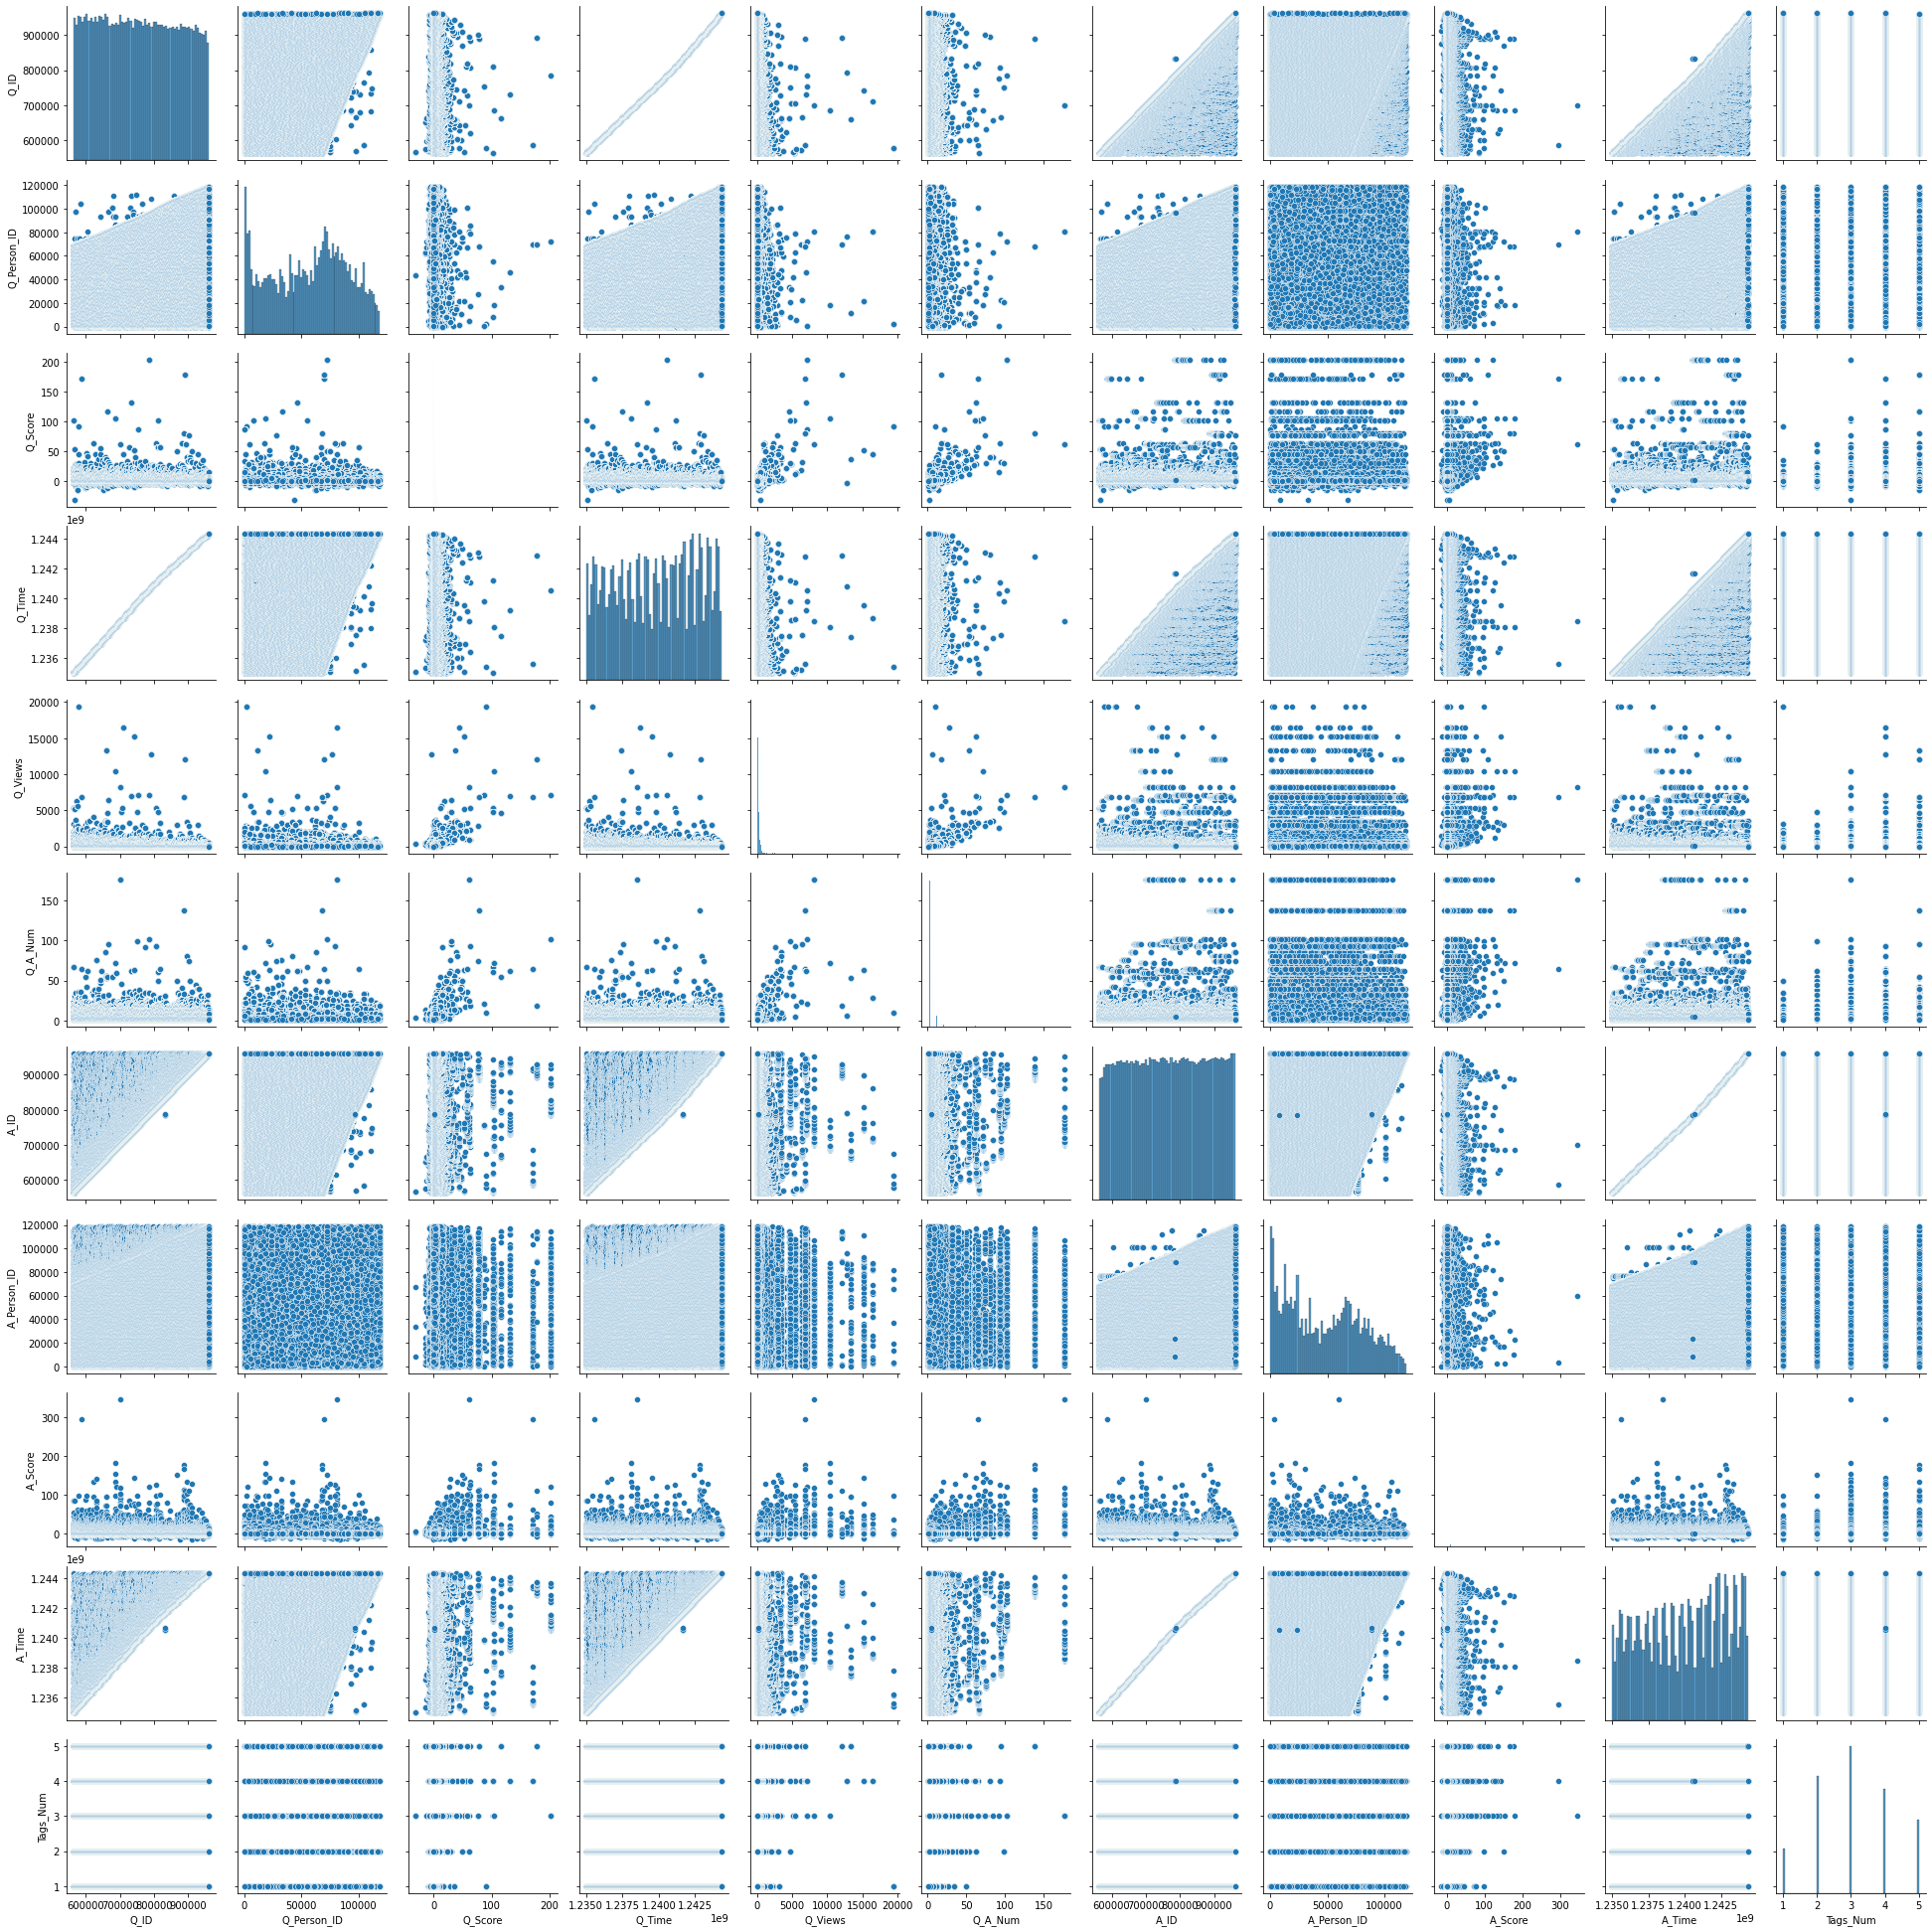

In [15]:
ax = sns.pairplot(answers)

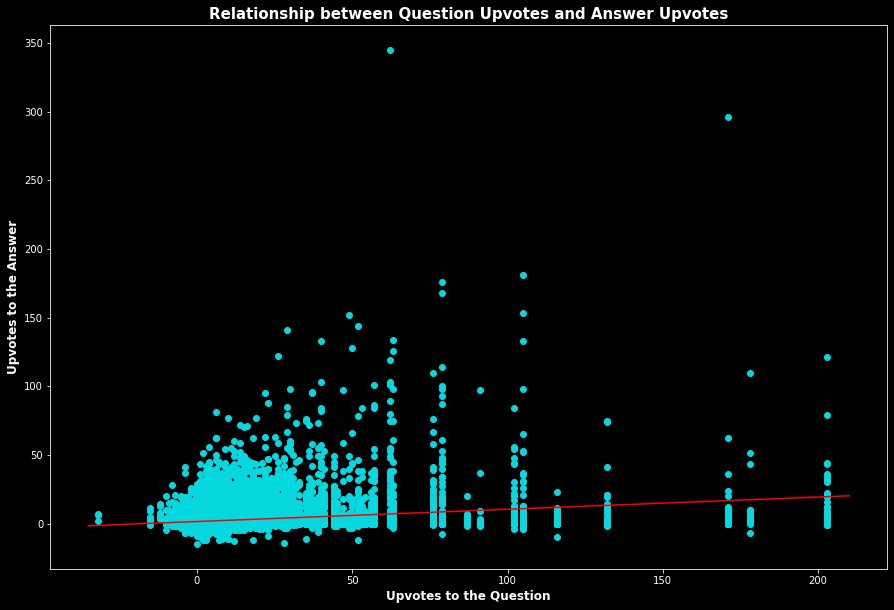

In [16]:
plt.style.use('dark_background')

x = np.linspace(-35,210)
y = 0.0891*x + 1.4427

fig, graph = plt.subplots(figsize=(15,10))

graph.scatter(answers['Q_Score'], answers['A_Score'], c='#07d7de')
graph.plot(x, y, '-r')

graph.set_xlabel('Upvotes to the Question', fontweight='bold', fontsize=12)
graph.set_ylabel('Upvotes to the Answer', fontweight='bold', fontsize=12)

graph.set_title('Relationship between Question Upvotes and Answer Upvotes', fontsize=15, fontweight='bold')

plt.show()

In [17]:
possible2 = list(answers.columns).copy()
possible2.remove('Tags')
possible2.remove('A_Score')
print(possible2)

for i in possible2:
    param = answers.columns[9] + ' ~ ' + i
    temp_model = ols(param, data=answers).fit()
    print(temp_model.rsquared_adj)

['Q_ID', 'Q_Person_ID', 'Q_Score', 'Q_Time', 'Q_Views', 'Q_A_Num', 'A_ID', 'A_Person_ID', 'A_Time', 'Tags_Num']
0.0006094641991079008
0.001450639265180187
0.04509529852998673
0.0006121286320136532
0.045441630726437254
0.04341004819560079
0.0018082813349488136
0.006963922683348667
0.0018047540218487645
0.00010023912156698067


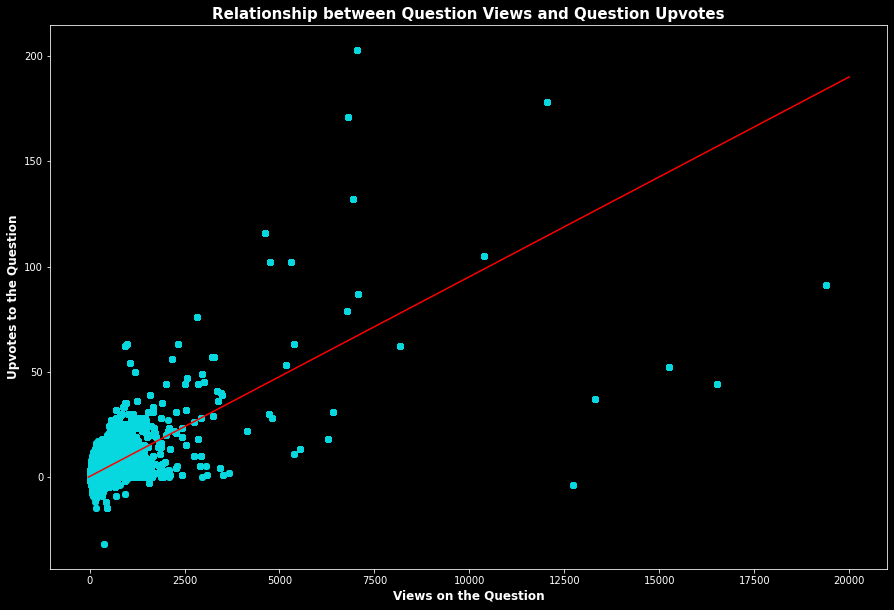

In [20]:
x = np.linspace(-35,20000)
y = 0.0095*x + 0.1339

fig, graph2 = plt.subplots(figsize=(15,10))

graph2.scatter(answers['Q_Views'], answers['Q_Score'], c='#07d7de')
graph2.plot(x, y, '-r')

graph2.set_xlabel('Views on the Question', fontweight='bold', fontsize=12)
graph2.set_ylabel('Upvotes to the Question', fontweight='bold', fontsize=12)

graph2.set_title('Relationship between Question Views and Question Upvotes', fontsize=15, fontweight='bold')

plt.show()